In [1]:
## Section 1: Testing 3 models

### First model: Facebook Prophet

In [2]:
#installing facebook prophet on anaconda which I use
#conda install -c conda-forge fbprophet

In [3]:
#change the working directory to the relevant path on my computer 
import os
os.chdir('D:\/Downloads-D')
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error #to calculate metrics for the model later
from fbprophet import Prophet #facebook prophet model

Importing plotly failed. Interactive plots will not work.


In [5]:
# Load the dataset using pandas
#data from Yahoo Finance
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y') #set the format of the dates
dta = pd.read_csv('GOOG (2).csv',sep=',', parse_dates=['Date'], 
                  date_parser=dateparse).fillna(0) #fill in any NA values with 0
dta.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,EPS,Revenue,Gross profit,Operating Income,EBITDA,Net income,PE Ratio,ROE
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500,6.67,18103,11182,4399,5666,4594,25.1,0.1449
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800,6.67,18103,11182,4399,5666,4594,25.1,0.1449
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,6.67,18103,11182,4399,5666,4594,25.1,0.1449
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,6.67,18103,11182,4399,5666,4594,25.1,0.1449
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,6.67,18103,11182,4399,5666,4594,25.1,0.1449


In [6]:
#Facebook Prophet only takes date and closing price as inputs, so we only need these two columns
dta = dta[["Date","Close"]] 
# The two columns must also be named "ds" and "y" exactly for the model to run
dta = dta.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset

In [7]:
dta

,ds,y
0,2015-01-02,523.373108
1,2015-01-05,512.463013
2,2015-01-06,500.585632
3,2015-01-07,499.727997
4,2015-01-08,501.303680
...,...,...
1469,2020-11-02,1626.030029
1470,2020-11-03,1650.209961
1471,2020-11-04,1749.130005
1472,2020-11-05,1763.369995


In [8]:
#Fitting the prophet model to the data
#I have not included daily seasonality as we do not have data on this. Weekly & yearly seasonality is included by default
model = Prophet() 
model.add_country_holidays(country_name='US') #including holidays in the model
model.fit(dta) 

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
model.train_holiday_names #holidays included

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

Note that in the above model, we set daily seasonality to True - this means we believe that there is seasonality in the stock price that should be accounted for. Scholarly articles have provided evidence of the existence of daily seasonality, such as the article from Peiro (1994) "Daily seasonality in stock returns". The article is cited in the reference section in the main write-up.

In [10]:
#Predicting 365 days into the future (1 year)
pred = model.make_future_dataframe(periods=365) 
pred_results = model.predict(pred)
print(pred_results)

             ds        trend   yhat_lower   yhat_upper  trend_lower  \
0    2015-01-02   492.944886   430.028496   565.539340   492.944886   
1    2015-01-05   494.799461   434.410407   571.320994   494.799461   
2    2015-01-06   495.417653   445.379118   576.192978   495.417653   
3    2015-01-07   496.035845   440.781307   580.969898   496.035845   
4    2015-01-08   496.654037   446.555118   582.497997   496.654037   
...         ...          ...          ...          ...          ...   
1834 2021-11-02  1869.607516  1760.412805  2009.387466  1774.044683   
1835 2021-11-03  1870.437364  1768.979069  2017.286029  1774.470652   
1836 2021-11-04  1871.267213  1770.121387  2023.859461  1774.878446   
1837 2021-11-05  1872.097061  1767.757149  2018.348385  1775.300812   
1838 2021-11-06  1872.926909  1789.764347  2043.074691  1775.757510   

      trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
0      492.944886            0.0                  0.0                

In [11]:
pred_results[['yhat', 'yhat_lower', 'yhat_upper']]

,yhat,yhat_lower,yhat_upper
0,498.710583,430.028496,565.539340
1,502.017410,434.410407,571.320994
2,505.388756,445.379118,576.192978
3,508.905763,440.781307,580.969898
4,511.481199,446.555118,582.497997
...,...,...,...
1834,1885.130482,1760.412805,2009.387466
1835,1887.788629,1768.979069,2017.286029
1836,1889.165647,1770.121387,2023.859461
1837,1889.783824,1767.757149,2018.348385


The above prediction results show yhat_lower and yhat_upper as the lower and upper ranges of the price prediction.
yhat at the end is the true prediction of the stock price. These are the 3 variables we are interested in.

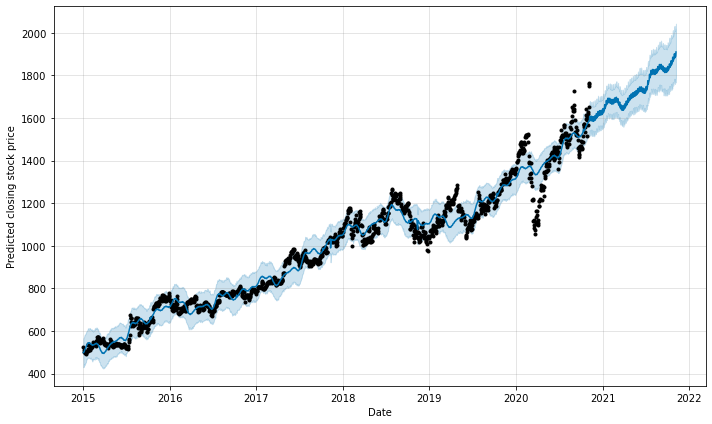

In [12]:
#Using the built in method for plotting the results in Facebook Prophet
model.plot(pred_results)
plt.xlabel("Date")
plt.ylabel("Predicted closing stock price")
plt.show()

The black dots are the actual data. The blue line is the stock price trend, and after the black dots is the prediction.
The lighter-shaded areas around the trend line are the yhat_lower and yhat_upper (95% confidence interval)

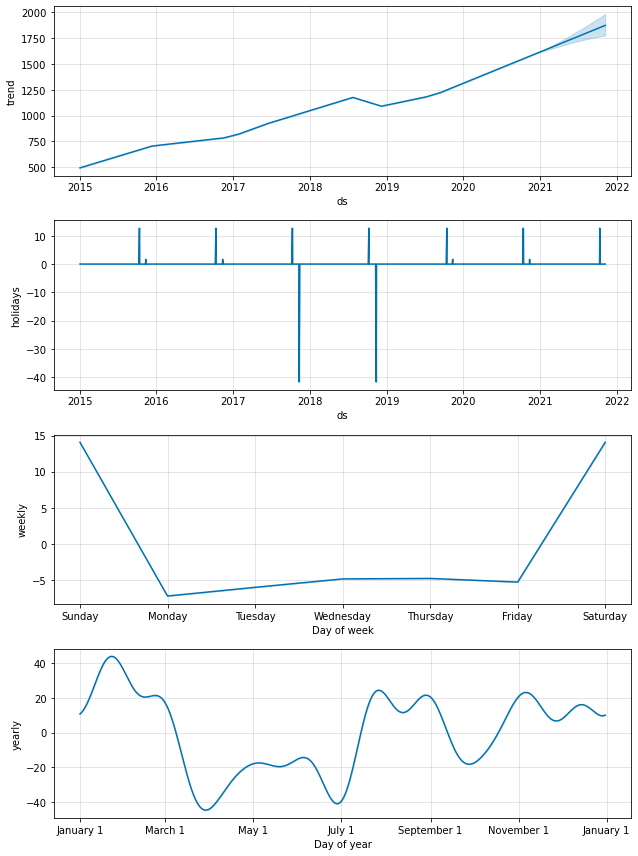

In [13]:
#breaking down the prediction of Facebook Prophet into its components: overall trend, daily, weekly and yearly trend
model.plot_components(pred_results)
plt.show()

Based on the results above we see that:

Overall trend for GOOG: overall upward trend (first graph)
. 
Weekly trend for GOOG: Up towards the middle of the week, then down towards the end. Weekends do not count since the 
market do not trade on weekends (second graph)

Yearly trend: Higher at the beginning of the two halves of the year (third graph)

Daily: We only consider from 9am to 4pm (trading hours) - it seems fluctuations are to be expected, without any particular 
trend (fourth graph)

### Testing Facebook Prophet###

Now, we split the data set and test the accuracy of the model

In [14]:
train_dta = dta[0:int(len(dta)*0.6)] #Training data: 60%
test_dta = dta[int(len(dta)*0.6):] #Test data: the remaining 40%
train_dta = train_dta.rename(columns = {"Date":"ds","Close":"y"}) #renaming as required by the model
model2 = Prophet() 
model2.add_country_holidays(country_name='US')

In [15]:
len(dta)*0.6

884.4

In [16]:
model2.fit(train_dta) # fit the model using the training data
pred2 = model2.make_future_dataframe(periods=590) #predict 578 days in the future (40% of the data)
pred_results2 = model2.predict(pred2)
prices = list(pred_results2['yhat'])
predicted_prices = prices[884:] #make the list of predicted prices to evaluate the model later

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
actual_prices = test_dta["y"].tolist()

In [18]:
# reporting model performance
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = math.sqrt(mean_squared_error(actual_prices, predicted_prices))
mape = np.mean(np.abs(np.array(predicted_prices) - actual_prices)/np.abs(actual_prices))
print('MSE: ', round(mse,2))
print('RMSE:', round(rmse,2))
print('MAPE: ', round(mape,2))

MSE:  19704.06
RMSE: 140.37
MAPE:  0.1


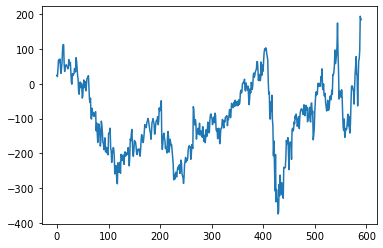

In [19]:
residuals = np.array(actual_prices) - np.array(predicted_prices)
x_axis = np.linspace(0, len(residuals),len(residuals))
plt.plot(x_axis,residuals)

The interpretation of the metrics will be included in the write-up.

## Second model: ARIMA##

In [20]:
#pip install pmdarima 
#un-comment the above line if necessary
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
import math

In [21]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y') #set the format of the dates
dta2 = pd.read_csv('GOOG (2).csv',sep=',',index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
#Without the built-in functions in Facebook prophet, we want to make the index to be the date so it's intuitive
#and easy to graph later
dta2['Close']

Date
2015-01-02     523.373108
2015-01-05     512.463013
2015-01-06     500.585632
2015-01-07     499.727997
2015-01-08     501.303680
                 ...     
2020-11-02    1626.030029
2020-11-03    1650.209961
2020-11-04    1749.130005
2020-11-05    1763.369995
2020-11-06    1761.750000
Name: Close, Length: 1474, dtype: float64

In [22]:
dta2_close = dta2['Close']

In [23]:
#Test for stationarity - if the data is stationary, we have to "de-trend" it to use ARIMA
#Take rolling statistics to smoothen the data
rolling_average = dta2_close.rolling(12).mean()
rolling_std = dta2_close.rolling(12).std()


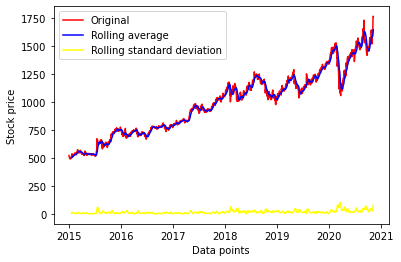

In [24]:
plt.figure()
plt.plot(dta2_close, label='Original', color='red')
plt.plot(rolling_average, label='Rolling average', color = 'blue')
plt.plot(rolling_std, label = 'Rolling standard deviation', color='yellow')
plt.legend()
plt.xlabel("Data points")
plt.ylabel("Stock price")
plt.show()

We see above that the data is NOT stationary. We will therefore take the log of the data for stationarity below

In [25]:
#Taking the log of the data for stationarity to apply the ARIMA model
dta2_log = np.log(dta2_close)
rolling_average_log = dta2_log.rolling(12).mean()
rolling_std_log = dta2_log.rolling(12).std()

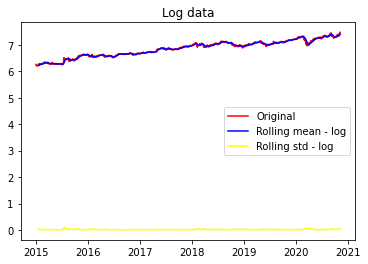

In [26]:
plt.plot(dta2_log, color='red', label='Original')
plt.plot(rolling_average_log, color ="blue", label = "Rolling mean - log")
plt.plot(rolling_std_log, color="yellow", label = "Rolling std - log")
plt.title('Log data')
plt.legend()
plt.show()


We see above that the data is now more stationary

In [27]:
train_data2 = dta2_log[:int(len(dta2_log)*0.6)] #train data: 60% of data like with Facebook Prophet
test_data2 = dta2_log[int(len(dta2_log)*0.6):] #test data: 40% of data remaining

In [28]:
train_data2

Date
2015-01-02    6.260295
2015-01-05    6.239229
2015-01-06    6.215779
2015-01-07    6.214064
2015-01-08    6.217212
                ...   
2018-06-29    7.017192
2018-07-02    7.027723
2018-07-03    7.005689
2018-07-05    7.024889
2018-07-06    7.038933
Name: Close, Length: 884, dtype: float64

In [29]:
#Implementing the model
#running auto_arima to figure out the optimal parameters for the model
model_autoARIMA = auto_arima(train_data2, start_p=0, start_q=0,
                      test='adf', # use adftest to find optimal 'd' (level of integration)
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series
                      d=None, # let model determine 'd'
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model_autoARIMA.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4972.046, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4973.972, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4974.097, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4970.766, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4972.339, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4972.324, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4970.320, Time=0.69 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-4973.230, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.269 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  884
Model:               SARIMAX(0, 1, 1)   Log Likelihood                2490.049
Date:                Wed, 09 Dec 2020   AIC                          -4974.097
Time:                        17:39:29   BIC                          -4959.747
Sample:                             0   HQIC                         -4968.610
                                - 884                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.001      1.632      0.103      -0.000       0.002
ma.L1          0.0651      0.026      2.531      0.011       0.015       0.115
sigma2         0.0002   4.13e-06     50.290      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       50.56   Jarque-Bera (JB):              7326.47
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
model_arima = ARIMA(train_data2, order=(0, 1, 1))  #parameter found above
model_fit = model_arima.fit(disp=-1)  
model_fit.summary()

D:\Downloads-D\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Downloads-D\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  883
Model:                 ARIMA(0, 1, 1)   Log Likelihood                2490.055
Method:                       css-mle   S.D. of innovations              0.014
Date:                Wed, 09 Dec 2020   AIC                          -4974.111
Time:                        17:39:29   BIC                          -4959.761
Sample:                             1   HQIC                         -4968.624
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0009      0.001      1.698      0.089      -0.000       0.002
ma.L1.D.Close     0.0691      0.034      2.023      0.043       0.002       0.136
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -14.4810           +0.0000j           14.4810            0.5000
-----------------------------------------------------------------------------
"""

In [31]:
# Deriving predictions
pred2, std_error, confint = model_fit.forecast(590, alpha=0.05)  #forecast 578 days - 40% of the data. Confint 95%

pred2_y = pd.Series(pred2, index=test_data2.index)

lower_pred_y = pd.Series(confint[:, 0], index=test_data2.index)
upper_pred_y = pd.Series(confint[:, 1], index=test_data2.index)

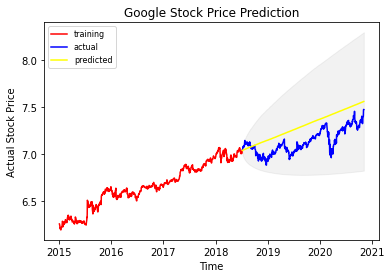

In [32]:
plt.figure()
plt.plot(train_data2, color='red', label='training')
plt.plot(test_data2, color = 'blue', label='actual')
plt.plot(pred2_y, color = 'yellow',label='predicted')
plt.title('Google Stock Price Prediction')
plt.fill_between(lower_pred_y.index, lower_pred_y, upper_pred_y, color='grey', alpha=.10) #creating the shaded confint area
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The ARIMA model predicts a straight line, with the shaded area being the confidence interval of the predictions.
At a glance, we see that this is not too accurate

In [33]:
# report performance (un-logging the data first)
mse = mean_squared_error(np.exp(test_data2), np.exp(pred2))
rmse = math.sqrt(mean_squared_error(np.exp(test_data2), np.exp(pred2)))
mape = np.mean(np.abs(np.exp(pred2) - np.exp(test_data2))/np.abs(np.exp(test_data2)))
print('MSE: ', round(mse,2))
print('RMSE: ', round(rmse,2))
print('MAPE: ', round(mape,2))

MSE:  69992.81
RMSE:  264.56
MAPE:  0.19


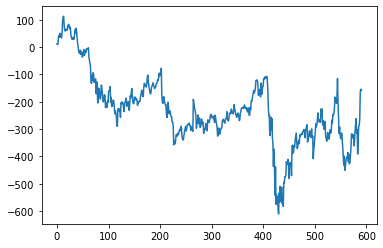

In [34]:
residuals = np.exp(test_data2) - np.exp(pred2)
x_axis = np.linspace(0, len(residuals),len(residuals))
plt.plot(x_axis,residuals)

Interpretations of these metrics will be in the write-up.

## Third model: Random Forest 

In [35]:
from time import time
import datetime
%matplotlib inline
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor


In [36]:
#We can reuse the data from Facebook Prophet - no changes are needed
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y') #set the format of the dates
dta3 = pd.read_csv('GOOG (2).csv',sep=',', parse_dates=['Date'], 
                  date_parser=dateparse).fillna(0)
dta3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,EPS,Revenue,Gross profit,Operating Income,EBITDA,Net income,PE Ratio,ROE
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500,6.67,18103,11182,4399,5666,4594,25.1,0.1449
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800,6.67,18103,11182,4399,5666,4594,25.1,0.1449
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,6.67,18103,11182,4399,5666,4594,25.1,0.1449
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,6.67,18103,11182,4399,5666,4594,25.1,0.1449
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,6.67,18103,11182,4399,5666,4594,25.1,0.1449


#### We will include a number of technical indicators as features for the random forest model below. These features include RSI, Stochastic Oscillator, Price Rate of Change, Moving Average Convergence Divergence, Williams % R

#### Calculating RSI ####

This stands for Relative Strength Index. This indicator indicates when whether a stock is being overbought or oversold - when RSI is above 70, the stock is overbought, which means it is priced more highly than it deserves. This would likely lead to a subsequent fall in price. If RSI is below 70, the stock might be oversold, and will likely enjoy a price increase.

The formula for RSI is: 

$RSI = 100 - 100/(1+RS)$

RS - Relative Strength - is the exponential moving average (EWMA) of the average gain, divided by the EWMA of average loss of the past 14 days (conventionally). The EWMA makes it so that we give less weight to older days and more weight to more recent days.

Note: To avoid data leakage, we make it so that the RSI of each day is calculated only based on data of the last 14 days
excluding that day itself. We do this by pushing the up and down columns (representing price changes) backwards one day, then calculate EWMA.

In [37]:
dta3['change_in_price'] = dta3['Close'].diff() #create the change in price column which calculates gains/losses

#now we need to create an "up" and a "down" column, containing gains/losses, to calculate the Relative Strength
up = dta3[['change_in_price']].copy()
down = dta3[['change_in_price']].copy()

#up only contains gains, losses are marked as 0. down only contains losses, gains are marked as 0
for i in range(len(up['change_in_price'])):
    if up['change_in_price'][i] < 0: 
        up['change_in_price'][i] = 0
    else:
        pass

for i in range(len(down['change_in_price'])):
    if down['change_in_price'][i] >0: 
        down['change_in_price'][i] = 0
    else:
        down['change_in_price'][i] = abs(down['change_in_price'][i]) #we want all changes to be in absolute value

#Avoid data leakage
df_up = pd.Series([np.nan]) #add one more NaN value at the beginning
df_up = df_up.append(up['change_in_price'], ignore_index=True)
df_up.drop(df_up.tail(1).index,inplace=True)
up['change_in_price'] = df_up
df_down = pd.Series([np.nan]) #add one more NaN value at the beginning
df_down = df_down.append(down['change_in_price'], ignore_index=True)
df_down.drop(df_down.tail(1).index,inplace=True)
down['change_in_price'] = df_down
        
        
# Calculate the EWMA (Exponential Weighted Moving Average)
ewma_up = up['change_in_price'].transform(lambda x: x.ewm(span = 14).mean())
ewma_down = down['change_in_price'].transform(lambda x: x.ewm(span = 14).mean())

# Calculate the RS
RS = ewma_up/ewma_down

# Calculate the RSI
RSI = 100.0 - (100.0 / (1.0 + RS))

dta3['down_days'] = down['change_in_price']
dta3['up_days'] = up['change_in_price']
dta3['RSI'] = RSI

dta3.head(10)

#We will drop the Nas latter

,Date,Open,High,Low,Close,Adj Close,Volume,EPS,Revenue,Gross profit,Operating Income,EBITDA,Net income,PE Ratio,ROE,change_in_price,down_days,up_days,RSI
0,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500,6.67,18103,11182,4399,5666,4594,25.1,0.1449,NaN,NaN,NaN,NaN
1,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800,6.67,18103,11182,4399,5666,4594,25.1,0.1449,-10.910095,NaN,NaN,NaN
2,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,6.67,18103,11182,4399,5666,4594,25.1,0.1449,-11.877381,10.910095,0.000000,0.000000
3,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,6.67,18103,11182,4399,5666,4594,25.1,0.1449,-0.857635,11.877381,0.000000,0.000000
4,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,6.67,18103,11182,4399,5666,4594,25.1,0.1449,1.575683,0.857635,0.000000,0.000000
5,2015-01-09,503.377991,503.537537,493.435272,494.811493,494.811493,2071300,6.67,18103,11182,4399,5666,4594,25.1,0.1449,-6.492187,0.000000,1.575683,8.590448
6,2015-01-12,493.584869,494.618011,486.225067,491.201416,491.201416,2326700,6.67,18103,11182,4399,5666,4594,25.1,0.1449,-3.610077,6.492187,0.000000,6.099437
7,2015-01-13,497.474182,501.602844,491.041840,494.821472,494.821472,2370400,6.67,18103,11182,4399,5666,4594,25.1,0.1449,3.620056,3.610077,0.000000,5.142641
8,2015-01-14,493.295654,501.852173,491.650177,499.498627,499.498627,2235700,6.67,18103,11182,4399,5666,4594,25.1,0.1449,4.677155,0.000000,3.620056,19.714458
9,2015-01-15,504.185760,504.295471,496.397156,500.416107,500.416107,2715800,6.67,18103,11182,4399,5666,4594,25.1,0.1449,0.917480,0.000000,4.677155,34.674696


#### Calculating Stochastic Oscillator ####

The Stochastic Oscillator follows the momentum of the price, which usually changes before the price actually changes. In other words, it helps to indicate the very near term movement of the price.

Formula:

$K = 100*(Current closing price - L14)/(H14/L14)$

With H14 being the highest high in the last 14 days, and L14 being the lowest low in the last 14 days (exclusive of today).  To avoid data leakage, we calculate the oscillator using not that day's closing price, but the day before that.

In [38]:
#Creating the high and low columns
high14 = dta3[['High']].copy()
low14 = dta3[['Low']].copy()
close_pushed = dta3['Close'].copy()
df_high = pd.Series([np.nan]) #add one more NaN value at the beginning
df_high = df_high.append(high14, ignore_index=True)
df_high.drop(df_high.tail(1).index,inplace=True)
high14 = df_high
df_low = pd.Series([np.nan]) #add one more NaN value at the beginning
df_low = df_low.append(low14, ignore_index=True)
df_low.drop(df_low.tail(1).index,inplace=True)
low14 = df_low
df_close = pd.Series([np.nan]) #add one more NaN value at the beginning
df_close = df_close.append(close_pushed, ignore_index=True)
df_close.drop(df_close.tail(1).index,inplace=True)
close_pushed = df_close


# We use the roll function to calculate the H14 and L14
high14 = high14['High'].transform(lambda x: x.rolling(window = 14).min())
low14 = low14['Low'].transform(lambda x: x.rolling(window = 14).max())

# Calculation of Stochastic Oscillator.
stoc_oscillator = 100 * ((close_pushed - low14) / (high14 - low14))
dta3['low14'] = low14
dta3['high14'] = high14
dta3['k_percent'] = stoc_oscillator
dta3[15:25] #first 14 data points will always be NaN

,Date,Open,High,Low,Close,Adj Close,Volume,EPS,Revenue,Gross profit,...,Net income,PE Ratio,ROE,change_in_price,down_days,up_days,RSI,low14,high14,k_percent
15,2015-01-26,537.055542,537.524231,528.219788,533.744629,533.744629,1543700,6.67,18103,11182,...,4594,25.1,0.1449,-4.726990,0.000000,5.544800,82.229428,531.540649,494.618011,-18.771600
16,2015-01-27,528.518921,529.246948,516.771179,517.210022,517.210022,1904000,6.67,18103,11182,...,4594,25.1,0.1449,-16.534607,4.726990,0.000000,73.051048,531.540649,494.618011,-5.969183
17,2015-01-28,521.348633,521.558044,508.603638,508.603638,508.603638,1683800,6.67,18103,11182,...,4594,25.1,0.1449,-8.606384,16.534607,0.000000,50.362629,531.540649,494.618011,38.812576
18,2015-01-29,509.600891,509.690643,499.827728,509.261810,509.261810,4186300,6.67,18103,11182,...,4594,25.1,0.1449,0.658172,8.606384,0.000000,42.445247,531.540649,494.618011,62.121810
19,2015-01-30,514.447571,538.391846,514.108521,533.056519,533.056519,5606300,6.67,18103,11182,...,4594,25.1,0.1449,23.794709,0.000000,0.658172,43.232723,531.540649,494.618011,60.339240
20,2015-02-02,530.274109,531.540649,517.130249,527.033020,527.033020,2849800,6.67,18103,11182,...,4594,25.1,0.1449,-6.023499,0.000000,23.794709,63.859753,531.540649,494.618011,-4.105530
21,2015-02-03,526.554321,531.939575,521.827332,527.790955,527.790955,2038600,6.67,18103,11182,...,4594,25.1,0.1449,0.757935,6.023499,0.000000,57.732378,531.540649,501.602844,15.056645
22,2015-02-04,527.790955,531.213562,519.842773,521.328674,521.328674,1663600,6.67,18103,11182,...,4594,25.1,0.1449,-6.462281,0.000000,0.757935,58.313113,531.540649,501.852173,12.630133
23,2015-02-05,522.355896,527.052979,520.660522,526.135498,526.135498,1849700,6.67,18103,11182,...,4594,25.1,0.1449,4.806824,6.462281,0.000000,51.369620,531.540649,504.295471,37.481770
24,2015-02-06,526.195313,535.729126,524.968689,529.546143,529.546143,1763500,6.67,18103,11182,...,4594,25.1,0.1449,3.410645,0.000000,4.806824,55.878629,531.540649,506.798584,21.845998


#### Calculating Price Rate of Change ####

The price rate of change is intuitive: it is the rate of change between the most current closing price and the closing price of n days ago. Choosing n depends on the horizon of the investors: short-term traders typically choose a n=9, while longer term investors often use larger n values, up to 200. Since our intended audience is longer-term investors, we take n=50 - we can afford to throw away 49 data points (The first 49 data points will have NaN values). Throwing away 200 data points is too much for our dataset.

Again, to avoid data leakage, the "current closing price" is interpreted to be the closest known closing price on a given day, which is that of one day earlier.

The indicator measures the momentum of the stock - a rising PRC above zero typically signals upward movement. A PRC that hovers near zero often indicate a consolidating price.

In [39]:
#the pct_change function helps us calculate the percentage change compared to n periods before
close_pushed = dta3['Close'].copy()
df_close = pd.Series([np.nan]) #add one more NaN value at the beginning
df_close = df_close.append(close_pushed, ignore_index=True)
df_close.drop(df_close.tail(1).index,inplace=True)
close_pushed = df_close
dta3['PRC'] = close_pushed.transform(lambda x: x.pct_change(periods = 50))
dta3[50:60]

,Date,Open,High,Low,Close,Adj Close,Volume,EPS,Revenue,Gross profit,...,PE Ratio,ROE,change_in_price,down_days,up_days,RSI,low14,high14,k_percent,PRC
50,2015-03-17,550.199402,552.283691,546.499573,549.331787,549.331787,1805500,6.67,18103,11182,...,25.1,0.1449,-3.659973,0.000000,7.170288,48.612852,571.840027,544.724487,69.510941,NaN
51,2015-03-18,550.987244,558.247314,545.502319,557.968079,557.968079,2134500,6.67,18103,11182,...,25.1,0.1449,8.636292,3.659973,0.000000,44.458904,571.840027,552.283691,115.094361,0.049599
52,2015-03-19,557.858398,559.264526,554.622314,556.462219,556.462219,1197200,6.67,18103,11182,...,25.1,0.1449,-1.505860,0.000000,8.636292,54.941796,571.840027,552.283691,70.933267,0.088797
53,2015-03-20,560.112183,560.182007,557.519348,558.825745,558.825745,2616800,6.67,18103,11182,...,25.1,0.1449,2.363526,1.505860,0.000000,52.931830,571.840027,552.283691,78.633380,0.111622
54,2015-03-23,558.895569,560.820251,554.308167,557.279968,557.279968,1643800,6.67,18103,11182,...,25.1,0.1449,-1.545777,0.000000,2.363526,55.856497,571.840027,552.283691,66.547650,0.118260
55,2015-03-24,561.019714,573.016785,559.673401,568.628845,568.628845,2583200,6.67,18103,11182,...,25.1,0.1449,11.348877,1.545777,0.000000,53.354678,571.840027,552.283691,74.451876,0.111661
56,2015-03-25,568.937988,570.693176,557.210205,557.255066,557.255066,2152200,6.67,18103,11182,...,25.1,0.1449,-11.373779,0.000000,11.348877,66.185172,571.840027,552.283691,16.420162,0.149183
57,2015-03-26,556.063354,557.369751,549.142334,553.649963,553.649963,1572600,6.67,18103,11182,...,25.1,0.1449,-3.605103,11.373779,0.000000,50.213355,565.208191,552.283691,61.535262,0.134474
58,2015-03-27,551.485901,553.759644,546.629211,546.838684,546.838684,1897400,6.67,18103,11182,...,25.1,0.1449,-6.811279,3.605103,0.000000,46.141036,561.992065,552.283691,85.926871,0.118888
59,2015-03-30,550.109680,551.954590,546.669128,550.518555,550.518555,1287500,6.67,18103,11182,...,25.1,0.1449,3.679871,6.811279,0.000000,39.208913,559.673401,552.283691,173.683636,0.094775


#### Calculate Moving Average Convergence Divergence ####

The Moving Average Convergence Divergence (MACD) is the difference between the Exponential Moving Average (EMA) of the closing price for the past 12 and 26 days - it also measures the momentum. We then compare the MACD with the Signal Line, which is calculated as the 9-day Exponential Moving Average of the MACD. If the MACD is below this line, it's a sell signal, otherwise it's a buy.

Formula:

$MACD = EMA_12(Close) - EMA_26(Close)$

$Signal line = EMA_9(MACD)$

In [40]:
#Again, push to avoid data leakage
close_pushed = dta3['Close'].copy()
df_close = pd.Series([np.nan]) #add one more NaN value at the beginning
df_close = df_close.append(close_pushed, ignore_index=True)
df_close.drop(df_close.tail(1).index,inplace=True)
close_pushed = df_close

#Again, use the ewm function like above for calculating EMA of the last 26 and 12 days
ema26 = dta3['Close'].transform(lambda x: x.ewm(span = 26).mean())
ema12 = dta3['Close'].transform(lambda x: x.ewm(span = 12).mean())
macd = ema12 - ema26
#Signal line
ema_9_macd = macd.ewm(span = 9).mean()
dta3['MACD'] = macd
dta3['MACD_EMA'] = ema_9_macd
dta3[30:40]

,Date,Open,High,Low,Close,Adj Close,Volume,EPS,Revenue,Gross profit,...,change_in_price,down_days,up_days,RSI,low14,high14,k_percent,PRC,MACD,MACD_EMA
30,2015-02-17,545.332764,548.494080,539.608521,541.353699,541.353699,1616800,6.67,18103,11182,...,-6.153137,0.000000,6.063355,72.353591,541.642944,509.690643,-18.352018,NaN,6.430702,4.936233
31,2015-02-18,539.917664,543.996460,536.038330,538.222290,538.222290,1453000,6.67,18103,11182,...,-3.131409,6.153137,0.000000,62.328085,541.642944,509.690643,0.905240,NaN,6.271729,5.203544
32,2015-02-19,536.566833,541.622986,536.536926,541.383606,541.383606,989100,6.67,18103,11182,...,3.161316,3.131409,0.000000,57.638344,541.642944,509.690643,10.705501,NaN,6.309120,5.424799
33,2015-02-20,541.642944,542.261230,534.333008,537.474365,537.474365,1444300,6.67,18103,11182,...,-3.909241,0.000000,3.161316,61.052047,541.642944,527.052979,1.777509,NaN,5.974470,5.534789
34,2015-02-23,534.582275,534.970215,527.960510,530.453613,530.453613,1457800,6.67,18103,11182,...,-7.020752,3.909241,0.000000,54.756143,541.642944,527.052979,28.571549,NaN,5.118435,5.451485
35,2015-02-24,528.548889,535.320251,526.803650,534.622192,534.622192,1005000,6.67,18103,11182,...,4.168579,7.020752,0.000000,45.115195,541.642944,527.052979,76.691966,NaN,4.703372,5.301814
36,2015-02-25,534.432739,544.724487,533.978943,542.380920,542.380920,1825900,6.67,18103,11182,...,7.758728,0.000000,4.168579,51.023064,541.642944,527.052979,48.120417,NaN,4.910560,5.223542
37,2015-02-26,541.722717,554.617310,540.017395,553.959106,553.959106,2311500,6.67,18103,11182,...,11.578186,0.000000,7.758728,60.219152,541.642944,527.052979,-5.058107,NaN,5.894318,5.357725
38,2015-02-27,552.722473,563.163818,551.386169,556.871094,556.871094,2410100,6.67,18103,11182,...,2.911988,0.000000,11.578186,69.938212,541.642944,530.543396,-110.960933,NaN,6.818189,5.649867
39,2015-03-02,558.995300,570.583435,557.220154,569.775696,569.775696,2129600,6.67,18103,11182,...,12.904602,0.000000,2.911988,71.928486,551.386169,530.543396,-26.315716,NaN,8.448841,6.209736


#### Calculating William % R ####

This indicator is calculated also using the current closing price, the lowest low of the last 14 days, and the highest high of the last 14 days. The formula is as follows:

$R = (H14 - C)/(H14 - L14)  - 100$

From the formula, intuitively we see that if William% R is too high or = 0 (which happens when the current price is the highest high in the most recent 14 days), it's a sell signal. Formally, according to industry norms, if the metric is below -80, it's a buy signal. If it's above -20, it's a sell.

In [41]:
#Calculation process is very similar to the Stochastic Oscillator. Again, we push to avoid data leakage
high14 = dta3[['High']].copy()
low14 = dta3[['Low']].copy()
close_pushed = dta3['Close'].copy()
df_high = pd.Series([np.nan]) #add one more NaN value at the beginning
df_high = df_high.append(high14, ignore_index=True)
df_high.drop(df_high.tail(1).index,inplace=True)
high14 = df_high
df_low = pd.Series([np.nan]) #add one more NaN value at the beginning
df_low = df_low.append(low14, ignore_index=True)
df_low.drop(df_low.tail(1).index,inplace=True)
low14 = df_low
df_close = pd.Series([np.nan]) #add one more NaN value at the beginning
df_close = df_close.append(close_pushed, ignore_index=True)
df_close.drop(df_close.tail(1).index,inplace=True)
close_pushed = df_close

# We use the roll function to calculate the H14 and L14
high14 = high14['High'].transform(lambda x: x.rolling(window = 14).min())
low14 = low14['Low'].transform(lambda x: x.rolling(window = 14).max())

# Calculate William %R 
r_william = ((high14 - close_pushed) / (high14 - low14)) * - 100
dta3['r_william'] = r_william
dta3[20:30]

,Date,Open,High,Low,Close,Adj Close,Volume,EPS,Revenue,Gross profit,...,down_days,up_days,RSI,low14,high14,k_percent,PRC,MACD,MACD_EMA,r_william
20,2015-02-02,530.274109,531.540649,517.130249,527.033020,527.033020,2849800,6.67,18103,11182,...,0.000000,23.794709,63.859753,531.540649,494.618011,-4.105530,NaN,3.664407,2.759501,-104.105530
21,2015-02-03,526.554321,531.939575,521.827332,527.790955,527.790955,2038600,6.67,18103,11182,...,6.023499,0.000000,57.732378,531.540649,501.602844,15.056645,NaN,3.907709,2.990849,-84.943355
22,2015-02-04,527.790955,531.213562,519.842773,521.328674,521.328674,1663600,6.67,18103,11182,...,0.000000,0.757935,58.313113,531.540649,501.852173,12.630133,NaN,3.611040,3.115624,-87.369867
23,2015-02-05,522.355896,527.052979,520.660522,526.135498,526.135498,1849700,6.67,18103,11182,...,6.462281,0.000000,51.369620,531.540649,504.295471,37.481770,NaN,3.668456,3.226715,-62.518230
24,2015-02-06,526.195313,535.729126,524.968689,529.546143,529.546143,1763500,6.67,18103,11182,...,0.000000,4.806824,55.878629,531.540649,506.798584,21.845998,NaN,3.907030,3.363294,-78.154002
25,2015-02-09,526.554321,530.543396,524.579773,526.384827,526.384827,1267700,6.67,18103,11182,...,0.000000,3.410645,58.991582,531.540649,509.690643,9.128171,NaN,3.824983,3.455912,-90.871829
26,2015-02-10,527.850769,536.227783,525.477295,535.469849,535.469849,1749800,6.67,18103,11182,...,3.161316,0.000000,54.852541,531.540649,509.690643,23.596433,NaN,4.360327,3.637233,-76.403567
27,2015-02-11,533.834351,536.975708,531.917603,534.502502,534.502502,1377700,6.67,18103,11182,...,0.000000,9.085022,63.373859,531.540649,509.690643,-17.982604,NaN,4.657759,3.841734,-117.982604
28,2015-02-12,535.778992,543.328308,533.209045,541.443481,541.443481,1620200,6.67,18103,11182,...,0.967347,0.000000,61.937603,531.917603,509.690643,-11.629566,NaN,5.336010,4.141052,-111.629566
29,2015-02-13,541.862305,548.404358,541.642944,547.506836,547.506836,1900300,6.67,18103,11182,...,0.000000,6.940979,67.951033,533.209045,509.690643,-35.012736,NaN,6.243945,4.562152,-135.012736


In [42]:
#dropping all the NaNs
dta3=dta3.dropna()
dta3.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume,EPS,Revenue,Gross profit,...,down_days,up_days,RSI,low14,high14,k_percent,PRC,MACD,MACD_EMA,r_william
51,2015-03-18,550.987244,558.247314,545.502319,557.968079,557.968079,2134500,6.67,18103,11182,...,3.659973,0.0,44.458904,571.840027,552.283691,115.094361,0.049599,4.674428,6.708451,15.094361


In [43]:
total = dta3.count()[0]
valid = 590 # 40% of the data like above as test data
train = total - valid #60% of the data to train

In [44]:
#make a copy so we leave the dta3 data set unchanged
dta3_copy = dta3
#including different features from above
features = ['Open', 'Close', 'Low', 'High', 'Volume','RSI','k_percent', 'PRC', 'r_william', 'MACD','EPS', 'Revenue',
           'Gross profit', 'Operating Income', 'EBITDA', 'Net income', 'PE Ratio', 'ROE']
x_dta3 = dta3_copy[features]
y_dta3 = dta3_copy['Close']
x_training = x_dta3[:train]
x_val = x_dta3[train:]
y_training = y_dta3[:train]
y_val = y_dta3[train:]

In [45]:
#Implementing the model
model3 = RandomForestRegressor(bootstrap=True)
model3.fit(x_training, y_training)
model3.predict(x_val)

array([1153.72320299, 1152.60919174, 1153.61139631, 1171.65897219,
       1172.44596928, 1172.70106692, 1172.16187137, 1172.61756717,
       1172.55826783, 1171.85706787, 1171.5751697 , 1172.46456792,
       1172.78896731, 1173.62476567, 1173.71976689, 1172.20916871,
       1172.00026856, 1172.00576659, 1172.06576659, 1172.06166748,
       1172.12626708, 1172.10436767, 1172.02806763, 1172.26326783,
       1172.42326783, 1171.82916747, 1171.6416687 , 1171.50217043,
       1171.6416687 , 1171.80036865, 1171.63066894, 1171.63066894,
       1171.63066894, 1171.63066894, 1171.63066894, 1171.63066894,
       1171.65336914, 1171.63066894, 1171.63886966, 1171.6033704 ,
       1171.45757082, 1171.58437014, 1167.91838624, 1164.14199086,
       1164.03928573, 1171.31927248, 1163.85078596, 1171.49697022,
       1170.96057129, 1157.5869029 , 1161.69900011, 1168.65067991,
       1171.63066894, 1164.5971874 , 1169.46437499, 1171.64377076,
       1171.6955701 , 1171.64967044, 1171.75297   , 1171.62916

In [46]:
forecast_forest = model3.predict(x_val)

In [47]:
real = y_dta3[train:].tolist()

In [48]:
# report performance
mse = mean_squared_error(real, forecast_forest)
rmse = math.sqrt(mean_squared_error(real, forecast_forest))
mape = np.mean(np.abs(np.array(forecast_forest) - real)/np.abs(real))
print('MSE: ', round(mse,2))
print('RMSE: ', round(rmse,2))
print('MAPE: ', round(mape,2))

MSE:  34060.39
RMSE:  184.55
MAPE:  0.08


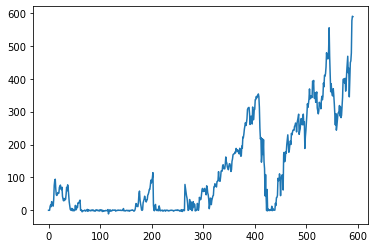

In [49]:
residuals = real - forecast_forest
x_axis = np.linspace(0, len(residuals),len(residuals))
plt.plot(x_axis,residuals)

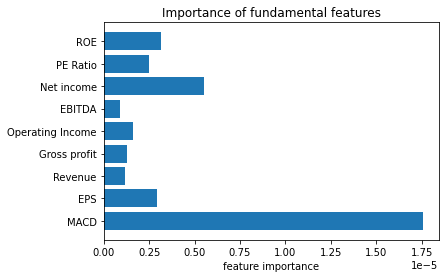

In [50]:
#calculating the impact of the fundamental features:
fundamental_features = features[9:]
weight_fundamental = model3.feature_importances_[9:]
plt.barh(fundamental_features, weight_fundamental)
plt.xlabel("feature importance")
plt.title("Importance of fundamental features")
plt.show()

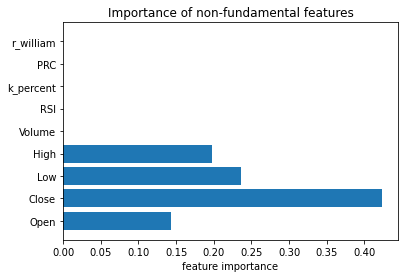

In [51]:
#calculating the impact of the non-fundamental features:
non_fundamental_features = features[:9]
weight_non_fundamental = model3.feature_importances_[:9]
plt.barh(non_fundamental_features, weight_non_fundamental)
plt.xlabel("feature importance")
plt.title("Importance of non-fundamental features")
plt.show()

Interpretations of these metrics and the importances will be in the write-up.

## Section 2: Testing with other stocks ##

This time with MMM - price has been much more stable over the past few years. Codes for the model are simply copied from above.

#### Facebook Prophet

In [52]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d') 
dta_mmm = pd.read_csv('MMM (1).csv',sep=',', parse_dates=['Date'], 
                  date_parser=dateparse).fillna(0)
dta_mmm = dta_mmm[["Date","Close"]] 
dta_mmm = dta_mmm.rename(columns = {"Date":"ds","Close":"y"})
train_dta_mmm = dta_mmm[0:int(len(dta_mmm)*0.6)] #Training data: 60%
test_dta_mmm = dta_mmm[int(len(dta_mmm)*0.6):] #Test data: the remaining 40%
train_dta_mmm = train_dta_mmm.rename(columns = {"Date":"ds","Close":"y"}) #renaming as required by the model
model_mmm = Prophet() 
model_mmm.add_country_holidays(country_name='US')
model_mmm.fit(train_dta_mmm) # fit the model using the training data
pred_mmm = model_mmm.make_future_dataframe(periods=590) #predict 556 days in the future (40% of the data)
pred_results_mmm = model_mmm.predict(pred_mmm)
prices_mmm = list(pred_results_mmm['yhat'])
predicted_prices_mmm = prices_mmm[884:] #make the list of predicted prices to evaluate the model later
actual_prices_mmm = test_dta_mmm["y"].tolist()
# reporting model performance
mse_mmm = mean_squared_error(actual_prices_mmm, predicted_prices_mmm)
rmse_mmm = math.sqrt(mean_squared_error(actual_prices_mmm, predicted_prices_mmm))
mape_mmm = np.mean(np.abs(np.array(predicted_prices_mmm) - actual_prices_mmm)/np.abs(actual_prices_mmm))
print('MSE: ', round(mse_mmm,2))
print('RMSE:', round(rmse_mmm,2))
print('MAPE: ', round(mape_mmm,2))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE:  356.0
RMSE: 18.87
MAPE:  0.09


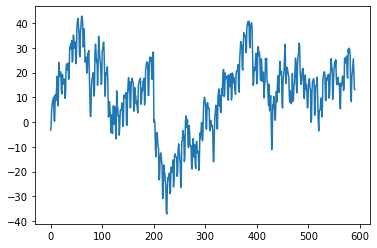

In [53]:
residuals_mmm = np.array(actual_prices_mmm) - np.array(predicted_prices_mmm)
x_axis = np.linspace(0, len(residuals_mmm),len(residuals_mmm))
plt.plot(x_axis,residuals_mmm)

#### ARIMA ####

In [54]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
dta_mmm = pd.read_csv('MMM (1).csv',sep=',',index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
dta_mmm_close = dta_mmm['Close']
dta_mmm_log = np.log(dta_mmm_close)
train_data_mmm = dta_mmm_log[:int(len(dta_mmm_log)*0.6)] #train data: 60% of data like with Facebook Prophet
test_data_mmm = dta_mmm_log[int(len(dta_mmm_log)*0.6):] #test data: 40% of data remaining
model_autoARIMA_mmm = auto_arima(train_data_mmm, start_p=0, start_q=0,
                      test='adf', # use adftest to find optimal 'd' (level of integration)
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series
                      d=None, # let model determine 'd'
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model_autoARIMA_mmm.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5491.281, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5490.986, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5490.913, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5492.946, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5488.541, Time=0.25 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.124 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  884
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2747.473
Date:                Wed, 09 Dec 2020   AIC                          -5492.946
Time:                        17:39:38   BIC                          -5488.162
Sample:                             0   HQIC                         -5491.117
                                - 884                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   2.62e-06     44.263      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       43.87   Jarque-Bera (JB):              1866.46
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.83
Prob(H) (two-sided):                  0.91   Kurtosis:                         9.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
model_arima_mmm = ARIMA(train_data_mmm, order=(0, 1, 0))  #parameter found above
model_fit_mmm = model_arima_mmm.fit(disp=-1)  
model_fit_mmm.summary()

D:\Downloads-D\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Downloads-D\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  883
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2747.641
Method:                           css   S.D. of innovations              0.011
Date:                Wed, 09 Dec 2020   AIC                          -5491.281
Time:                        17:39:38   BIC                          -5481.714
Sample:                             1   HQIC                         -5487.623
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.579      0.563      -0.001       0.001
==============================================================================
"""

In [56]:
# Deriving predictions
pred_mmm, std_error, confint = model_fit_mmm.forecast(590, alpha=0.05)  #forecast 578 days - 40% of the data. Confint 95%

pred_mmm_y = pd.Series(pred_mmm, index=test_data_mmm.index)

# report performance (un-logging the data first)
mse = mean_squared_error(np.exp(test_data_mmm), np.exp(pred_mmm))
rmse = math.sqrt(mean_squared_error(np.exp(test_data_mmm), np.exp(pred_mmm)))
mape = np.mean(np.abs(np.exp(pred_mmm) - np.exp(test_data_mmm))/np.abs(np.exp(test_data_mmm)))
print('MSE: ', round(mse,2))
print('RMSE: ', round(rmse,2))
print('MAPE: ', round(mape,2))

MSE:  1955.66
RMSE:  44.22
MAPE:  0.23


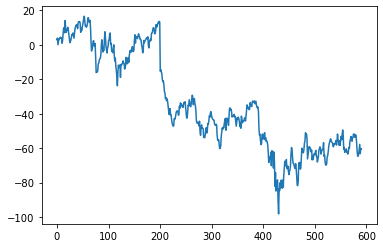

In [57]:
residuals_mmm = np.exp(test_data_mmm) - np.exp(pred_mmm)
x_axis = np.linspace(0, len(residuals_mmm),len(residuals_mmm))
plt.plot(x_axis,residuals_mmm)

#### Random Forest

In [58]:
dta_mmm2 = pd.read_csv('MMM (1).csv',sep=',', parse_dates=['Date'], 
                  date_parser=dateparse).fillna(0)
dta_mmm2['change_in_price'] = dta_mmm2['Close'].diff() #create the change in price column which calculates gains/losses

#now we need to create an "up" and a "down" column, containing gains/losses, to calculate the Relative Strength
up = dta_mmm2[['change_in_price']].copy()
down = dta_mmm2[['change_in_price']].copy()

#up only contains gains, losses are marked as 0. down only contains losses, gains are marked as 0
for i in range(len(up['change_in_price'])):
    if up['change_in_price'][i] <0: 
        up['change_in_price'][i] = 0
    else:
        pass

for i in range(len(down['change_in_price'])):
    if down['change_in_price'][i] >0: 
        down['change_in_price'][i] = 0
    else:
        down['change_in_price'][i] = abs(down['change_in_price'][i]) #we want all changes to be in absolute value

#Avoid data leakage
df_up = pd.Series([np.nan]) #add one more NaN value at the beginning
df_up = df_up.append(up['change_in_price'], ignore_index=True)
df_up.drop(df_up.tail(1).index,inplace=True)
up['change_in_price'] = df_up
df_down = pd.Series([np.nan]) #add one more NaN value at the beginning
df_down = df_down.append(down['change_in_price'], ignore_index=True)
df_down.drop(df_down.tail(1).index,inplace=True)
down['change_in_price'] = df_down
# Calculate the EWMA (Exponential Weighted Moving Average)
ewma_up = up['change_in_price'].transform(lambda x: x.ewm(span = 14).mean())
ewma_down = down['change_in_price'].transform(lambda x: x.ewm(span = 14).mean())

# Calculate the RS
RS = ewma_up/ewma_down

# Calculate the RSI
RSI = 100.0 - (100.0 / (1.0 + RS))

dta_mmm2['down_days'] = down['change_in_price']
dta_mmm2['up_days'] = up['change_in_price']
dta_mmm2['RSI'] = RSI

#Creating the high and low and close columns
high14 = dta_mmm2[['High']].copy()
low14 = dta_mmm2[['Low']].copy()
close_pushed = dta3['Close'].copy()
df_high = pd.Series([np.nan]) #add one more NaN value at the beginning
df_high = df_high.append(high14, ignore_index=True)
df_high.drop(df_high.tail(1).index,inplace=True)
high14 = df_high
df_low = pd.Series([np.nan]) #add one more NaN value at the beginning
df_low = df_low.append(low14, ignore_index=True)
df_low.drop(df_low.tail(1).index,inplace=True)
low14 = df_low
df_close = pd.Series([np.nan]) #add one more NaN value at the beginning
df_close = df_close.append(close_pushed, ignore_index=True)
df_close.drop(df_close.tail(1).index,inplace=True)
close_pushed = df_close

# We use the roll function to calculate the H14 and L14
high14 = high14['High'].transform(lambda x: x.rolling(window = 14).min())
low14 = low14['Low'].transform(lambda x: x.rolling(window = 14).max())

# Calculation of Stochastic Oscillator.
stoc_oscillator = 100 * ((close_pushed - low14) / (high14 - low14))
dta_mmm2['low14'] = low14
dta_mmm2['high14'] = high14
dta_mmm2['k_percent'] = stoc_oscillator

dta_mmm2['PRC'] = close_pushed.transform(lambda x: x.pct_change(periods = 50))

ema26 = close_pushed.transform(lambda x: x.ewm(span = 26).mean())
ema12 = close_pushed.transform(lambda x: x.ewm(span = 12).mean())
macd = ema12 - ema26
#Signal line
ema_9_macd = macd.ewm(span = 9).mean()
dta_mmm2['MACD'] = macd
dta_mmm2['MACD_EMA'] = ema_9_macd

high14 = dta_mmm2[['High']].copy()
low14 = dta_mmm2[['Low']].copy()

# We use the roll function to calculate the H14 and L14
high14 = high14['High'].transform(lambda x: x.rolling(window = 14).min())
low14 = low14['Low'].transform(lambda x: x.rolling(window = 14).max())

# Calculate William %R 
r_william = ((high14 - close_pushed) / (high14 - low14)) * - 100
dta_mmm2['r_william'] = r_william

dta_mmm2=dta_mmm2.dropna()

total = dta_mmm2.count()[0]
valid = 590 # 40% of the data like above as test data
train = total - valid #60% of the data to train

#make a copy so we leave the dta3 data set unchanged
dta_mmm2_copy = dta_mmm2
#including different features from above
features = ['Open','Close', 'Low', 'High', 'Volume','RSI','k_percent', 'PRC', 'r_william', 'MACD']
x_dta_mmm2 = dta_mmm2_copy[features]
y_dta_mmm2 = dta_mmm2_copy['Close']
x_training = x_dta_mmm2[:train]
x_val = x_dta_mmm2[train:]
y_training = y_dta_mmm2[:train]
y_val = y_dta_mmm2[train:]
x_val.drop(['RSI','k_percent', 'PRC', 'r_william', 'MACD'], axis=1)
#this makes the test data to be completely independent of the training data - I removed all the technical features

model_mmm2 = RandomForestRegressor(bootstrap=True)
model_mmm2.fit(x_training, y_training)
forecast_forest_mmm2 = model_mmm2.predict(x_val)
real_mmm2 = y_dta_mmm2[train:].tolist()

# report performance
mse_mmm2 = mean_squared_error(real_mmm2, forecast_forest_mmm2)
rmse_mmm2 = math.sqrt(mean_squared_error(real_mmm2, forecast_forest_mmm2))
mape_mmm2 = np.mean(np.abs(np.array(forecast_forest_mmm2) - real_mmm2)/np.abs(real_mmm2))
print('MSE: ', round(mse_mmm2,2))
print('RMSE: ', round(rmse_mmm2,2))
print('MAPE: ', round(mape_mmm2,2))

MSE:  1.38
RMSE:  1.18
MAPE:  0.0


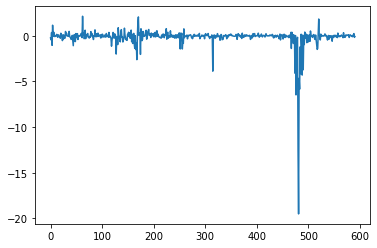

In [59]:
residuals_mmm = real_mmm2 - forecast_forest_mmm2
x_axis = np.linspace(0, len(residuals_mmm),len(residuals_mmm))
plt.plot(x_axis,residuals_mmm)

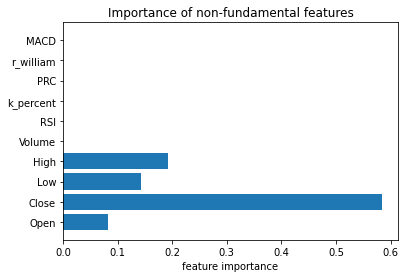

In [60]:
#calculating the impact of the non-fundamental features:
non_fundamental_features = features
weight_non_fundamental = model_mmm2.feature_importances_
plt.barh(non_fundamental_features, weight_non_fundamental)
plt.xlabel("feature importance")
plt.title("Importance of non-fundamental features")
plt.show()

#### Now we test with IBM, a stock that has a downward trend (last 5 years)

##### Facebook Prophet

In [61]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d') 
dta_ibm = pd.read_csv('IBM.csv',sep=',', parse_dates=['Date'], 
                  date_parser=dateparse).fillna(0)
dta_ibm = dta_ibm[["Date","Close"]] 
dta_ibm = dta_ibm.rename(columns = {"Date":"ds","Close":"y"})
train_dta_ibm = dta_ibm[0:int(len(dta_ibm)*0.6)] #Training data: 60%
test_dta_ibm = dta_ibm[int(len(dta_ibm)*0.6):] #Test data: the remaining 40%
train_dta_ibm = train_dta_ibm.rename(columns = {"Date":"ds","Close":"y"}) #renaming as required by the model
model_ibm = Prophet() 
model_ibm.add_country_holidays(country_name='US')
model_ibm.fit(train_dta_ibm) # fit the model using the training data
pred_ibm = model_ibm.make_future_dataframe(periods=590) #predict 556 days in the future (40% of the data)
pred_results_ibm = model_ibm.predict(pred_ibm)
prices_ibm = list(pred_results_ibm['yhat'])
predicted_prices_ibm = prices_ibm[884:] #make the list of predicted prices to evaluate the model later
actual_prices_ibm = test_dta_ibm["y"].tolist()
# reporting model performance
mse_ibm = mean_squared_error(actual_prices_ibm, predicted_prices_ibm)
rmse_ibm = math.sqrt(mean_squared_error(actual_prices_ibm, predicted_prices_ibm))
mape_ibm = np.mean(np.abs(np.array(predicted_prices_ibm) - actual_prices_ibm)/np.abs(actual_prices_ibm))
print('MSE: ', round(mse_ibm,2))
print('RMSE:', round(rmse_ibm,2))
print('MAPE: ', round(mape_ibm,2))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MSE:  147.99
RMSE: 12.17
MAPE:  0.07


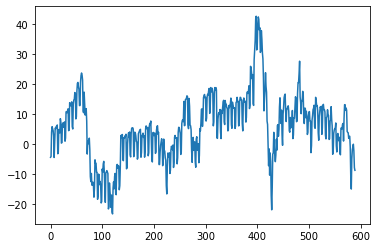

In [62]:
residuals_ibm = np.array(actual_prices_ibm) - np.array(predicted_prices_ibm)
plt.plot(residuals_ibm)

##### ARIMA

In [63]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
dta_ibm = pd.read_csv('IBM.csv',sep=',',index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
dta_ibm_close = dta_ibm['Close']
dta_ibm_log = np.log(dta_ibm_close)
train_data_ibm = dta_ibm_log[:int(len(dta_ibm_log)*0.6)] #train data: 60% of data like with Facebook Prophet
test_data_ibm = dta_ibm_log[int(len(dta_ibm_log)*0.6):] #test data: 40% of data remaining
model_autoARIMA_ibm = auto_arima(train_data_ibm, start_p=0, start_q=0,
                      test='adf', # use adftest to find optimal 'd' (level of integration)
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series
                      d=None, # let model determine 'd'
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
model_autoARIMA_ibm.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5230.813, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5228.815, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5228.815, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5232.692, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5228.901, Time=0.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.054 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  884
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2617.346
Date:                Wed, 09 Dec 2020   AIC                          -5232.692
Time:                        17:39:46   BIC                          -5227.909
Sample:                             0   HQIC                         -5230.863
                                - 884                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   3.53e-06     44.090      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       42.66   Jarque-Bera (JB):              1727.95
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.54
Prob(H) (two-sided):                  0.02   Kurtosis:                         9.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
model_arima_ibm = ARIMA(train_data_ibm, order=(0, 1, 0))  #parameter found above
model_fit_ibm = model_arima_ibm.fit(disp=-1)  
model_fit_ibm.summary()

D:\Downloads-D\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Downloads-D\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  883
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2617.406
Method:                           css   S.D. of innovations              0.012
Date:                Wed, 09 Dec 2020   AIC                          -5230.813
Time:                        17:39:46   BIC                          -5221.246
Sample:                             1   HQIC                         -5227.155
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.347      0.729      -0.001       0.001
==============================================================================
"""

In [65]:
# Deriving predictions
pred_ibm, std_error, confint = model_fit_ibm.forecast(590, alpha=0.05)  #forecast 578 days - 40% of the data. Confint 95%

pred_ibm_y = pd.Series(pred_ibm, index=test_data_ibm.index)

# report performance (un-logging the data first)
mse = mean_squared_error(np.exp(test_data_ibm), np.exp(pred_ibm))
rmse = math.sqrt(mean_squared_error(np.exp(test_data_ibm), np.exp(pred_ibm)))
mape = np.mean(np.abs(np.exp(pred_ibm) - np.exp(test_data_ibm))/np.abs(np.exp(test_data_ibm)))
print('MSE: ', round(mse,2))
print('RMSE: ', round(rmse,2))
print('MAPE: ', round(mape,2))

MSE:  126.02
RMSE:  11.23
MAPE:  0.07


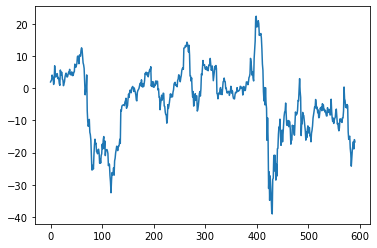

In [66]:
residuals_ibm = np.exp(test_data_ibm) - np.exp(pred_ibm)
x_axis = np.linspace(0, len(residuals_ibm),len(residuals_ibm))
plt.plot(x_axis,residuals_ibm)

##### Random Forest

In [67]:
dta_ibm2 = pd.read_csv('IBM.csv',sep=',', parse_dates=['Date'], 
                  date_parser=dateparse).fillna(0)
dta_ibm2['change_in_price'] = dta_ibm2['Close'].diff() #create the change in price column which calculates gains/losses

#now we need to create an "up" and a "down" column, containing gains/losses, to calculate the Relative Strength
up = dta_ibm2[['change_in_price']].copy()
down = dta_ibm2[['change_in_price']].copy()

#up only contains gains, losses are marked as 0. down only contains losses, gains are marked as 0
for i in range(len(up['change_in_price'])):
    if up['change_in_price'][i] <0: 
        up['change_in_price'][i] = 0
    else:
        pass

for i in range(len(down['change_in_price'])):
    if down['change_in_price'][i] >0: 
        down['change_in_price'][i] = 0
    else:
        down['change_in_price'][i] = abs(down['change_in_price'][i]) #we want all changes to be in absolute value

# Calculate the EWMA (Exponential Weighted Moving Average)
ewma_up = up['change_in_price'].transform(lambda x: x.ewm(span = 14).mean())
ewma_down = down['change_in_price'].transform(lambda x: x.ewm(span = 14).mean())

#Avoid data leakage
df_up = pd.Series([np.nan]) #add one more NaN value at the beginning
df_up = df_up.append(up['change_in_price'], ignore_index=True)
df_up.drop(df_up.tail(1).index,inplace=True)
up['change_in_price'] = df_up
df_down = pd.Series([np.nan]) #add one more NaN value at the beginning
df_down = df_down.append(down['change_in_price'], ignore_index=True)
df_down.drop(df_down.tail(1).index,inplace=True)
down['change_in_price'] = df_down
# Calculate the EWMA (Exponential Weighted Moving Average)
ewma_up = up['change_in_price'].transform(lambda x: x.ewm(span = 14).mean())
ewma_down = down['change_in_price'].transform(lambda x: x.ewm(span = 14).mean())

# Calculate the RS
RS = ewma_up/ewma_down

# Calculate the RSI
RSI = 100.0 - (100.0 / (1.0 + RS))

dta_ibm2['down_days'] = down['change_in_price']
dta_ibm2['up_days'] = up['change_in_price']
dta_ibm2['RSI'] = RSI

#Creating the high and low columns
high14 = dta_ibm2[['High']].copy()
low14 = dta_ibm2[['Low']].copy()
close_pushed = dta3['Close'].copy()
df_high = pd.Series([np.nan]) #add one more NaN value at the beginning
df_high = df_high.append(high14, ignore_index=True)
df_high.drop(df_high.tail(1).index,inplace=True)
high14 = df_high
df_low = pd.Series([np.nan]) #add one more NaN value at the beginning
df_low = df_low.append(low14, ignore_index=True)
df_low.drop(df_low.tail(1).index,inplace=True)
low14 = df_low
df_close = pd.Series([np.nan]) #add one more NaN value at the beginning
df_close = df_close.append(close_pushed, ignore_index=True)
df_close.drop(df_close.tail(1).index,inplace=True)
close_pushed = df_close

# We use the roll function to calculate the H14 and L14
high14 = high14['High'].transform(lambda x: x.rolling(window = 14).min())
low14 = low14['Low'].transform(lambda x: x.rolling(window = 14).max())

# Calculation of Stochastic Oscillator.
stoc_oscillator = 100 * ((close_pushed - low14) / (high14 - low14))
dta_ibm2['low14'] = low14
dta_ibm2['high14'] = high14
dta_ibm2['k_percent'] = stoc_oscillator

dta_ibm2['PRC'] = close_pushed.transform(lambda x: x.pct_change(periods = 50))

ema26 = close_pushed.transform(lambda x: x.ewm(span = 26).mean())
ema12 = close_pushed.transform(lambda x: x.ewm(span = 12).mean())
macd = ema12 - ema26
#Signal line
ema_9_macd = macd.ewm(span = 9).mean()
dta_ibm2['MACD'] = macd
dta_ibm2['MACD_EMA'] = ema_9_macd

high14 = dta_ibm2[['High']].copy()
low14 = dta_ibm2[['Low']].copy()

# We use the roll function to calculate the H14 and L14
high14 = high14['High'].transform(lambda x: x.rolling(window = 14).min())
low14 = low14['Low'].transform(lambda x: x.rolling(window = 14).max())

# Calculate William %R 
r_william = ((high14 - close_pushed) / (high14 - low14)) * - 100
dta_ibm2['r_william'] = r_william

dta_ibm2=dta_ibm2.dropna()

total = dta_ibm2.count()[0]
valid = 590 # 40% of the data like above as test data
train = total - valid #60% of the data to train

#make a copy so we leave the dta3 data set unchanged
dta_ibm2_copy = dta_ibm2
#including different features from above
features = ['Open','Close', 'Low', 'High', 'Volume','RSI','k_percent', 'PRC', 'r_william', 'MACD']
x_dta_ibm2 = dta_ibm2_copy[features]
y_dta_ibm2 = dta_ibm2_copy['Close']
x_training = x_dta_ibm2[:train]
x_val = x_dta_ibm2[train:]
y_training = y_dta_ibm2[:train]
y_val = y_dta_ibm2[train:]
x_val.drop(['RSI','k_percent', 'PRC', 'r_william', 'MACD'], axis=1)
#this makes the test data to be completely independent of the training data - I removed all the technical features

model_ibm2 = RandomForestRegressor(bootstrap=True)
model_ibm2.fit(x_training, y_training)
forecast_forest_ibm2 = model_ibm2.predict(x_val)
real_ibm2 = y_dta_ibm2[train:]

# report performance
mse_ibm2 = mean_squared_error(real_ibm2, forecast_forest_ibm2)
rmse_ibm2 = math.sqrt(mean_squared_error(real_ibm2, forecast_forest_ibm2))
mape_ibm2 = np.mean(np.abs(np.array(forecast_forest_ibm2) - real_ibm2)/np.abs(real_ibm2))
print('MSE: ', round(mse_ibm2,2))
print('RMSE: ', round(rmse_ibm2,2))
print('MAPE: ', round(mape_ibm2,2))

MSE:  8.39
RMSE:  2.9
MAPE:  0.01


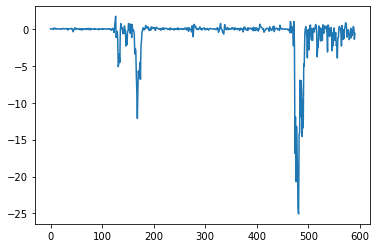

In [68]:
residuals_ibm = real_ibm2-forecast_forest_ibm2
x_axis = np.linspace(0, len(residuals_ibm),len(residuals_ibm))
plt.plot(x_axis,residuals_ibm)

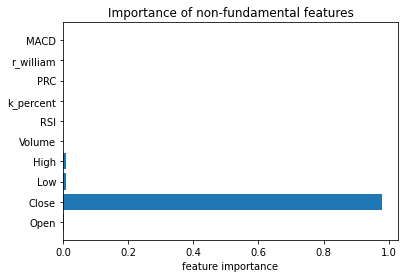

In [69]:
#calculating the impact of the non-fundamental features:
non_fundamental_features = features
weight_non_fundamental = model_ibm2.feature_importances_
plt.barh(non_fundamental_features, weight_non_fundamental)
plt.xlabel("feature importance")
plt.title("Importance of non-fundamental features")
plt.show()

## Section 3: Optimization

In [70]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [71]:
ibm_price = forecast_forest_ibm2.tolist()
mmm_price = forecast_forest_mmm2.tolist()
goog_price= forecast_forest.tolist()
price_dict = {'IBM': ibm_price, 'MMM': mmm_price,'GOOG': goog_price}

In [72]:
df = pd.DataFrame(data=price_dict)

In [73]:
def annualise(allocation, mean_returns, covariance):
    """Function to annualise the standard deviation and return of each portfolio

    Parameters
    ----------
    allocation
        The weight given to each stock in the portfolio
    mean_returns
        The mean return of each stock in the portfolio
    covariance
        The covariance matrix of the stocks in the portfolio
    
    Returns
    -------
    std_annual
        annualised standard deviation
    return_annual
        annualised return

    """
    std_annual = np.sqrt(np.dot(allocation.T, np.dot(covariance, allocation))) * np.sqrt(252)
    return_annual = np.sum(mean_returns*allocation ) *252 #252 trading days per year
    return std_annual, return_annual

In [74]:
def create_random_portfolios(mean_returns, covariance, risk_free_rate):
    """Function to create 50000 random portfolios using the above stocks for the efficient frontier.

    Parameters
    ----------
    mean_returns
        The mean return of each stock in the portfolio
    covariance
        The covariance matrix of the stocks in the portfolio
    risk_free_rate
        Current risk-free rate. We want to invest the cash portion of the portfolio in risk-free treasury
    
    Returns
    -------
    results
        list of standard deviation, return and Sharpe ratio of each portfolio
    list_weights
        list of portfolios

    """
    list_weights = []
    results = np.zeros((len(df.columns),50000)) #50000 portfolios
    for i in range(50000):
        allocation = np.random.random(len(df.columns)) #randoming the allocation 
        allocation = allocation/sum(allocation) #normalizing the randomed vectors so they sum to 1
        list_weights.append(allocation)
        std_dev = annualise(allocation, mean_returns, covariance)[0] #annualise the std and return of the portfolio
        returns = annualise(allocation, mean_returns, covariance)[1]
        results[0,i] = std_dev  
        results[1,i] = returns 
        results[2,i] = (returns - risk_free_rate) / std_dev #Sharpe ratio
    return results, list_weights

In [75]:
returns = df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
risk_free_rate = 0.0083

In [76]:
cov_matrix

,IBM,MMM,GOOG
IBM,1.857342e-04,0.000102,-7.648070e-07
MMM,1.020906e-04,0.000260,2.172712e-06
GOOG,-7.648070e-07,0.000002,1.346653e-04


In [77]:
'''
Now we define function to plot the efficient frontier with the optimal portfolio highlighted using the results above.
The optimal portfolio is found by taking the portfolio with the maximum Sharpe ratio (excess returns given the risk)
among the 50000 portfolios that we randomly created. We also display the portfolio with the smallest possible 
risk.
'''

def display_simulated_ef_with_random(mean_returns, covariance, risk_free_rate):
    """Function graph the efficient frontier and print out the optimal portfolios

    Parameters
    ----------
    mean_returns
        The mean return of each stock in the portfolio
    covariance
        The covariance matrix of the stocks in the portfolio
    risk_free_rate
        Current risk-free rate. We want to invest the cash portion of the portfolio in risk-free treasury
    """
    results = create_random_portfolios(mean_returns, covariance, risk_free_rate)[0]
    weights = create_random_portfolios(mean_returns, covariance, risk_free_rate)[1]
    #For the portfolio with maximum sharpe
    index_max_sharpe = np.argmax(results[2]) #the maximum sharpe ratio among 30000 portfolios randomed
    std_max_sharpe = results[0,index_max_sharpe]
    return_max_sharpe = results[1,index_max_sharpe]
    allocation_max_sharpe = weights[index_max_sharpe]
    #For the portfolio with the lowest risk
    index_min_risk = np.argmin(results[0])
    std_min_risk = results[0, index_min_risk]
    return_min_risk = results[1, index_min_risk]
    allocation_min_risk = weights[index_min_risk]
    #Printing out the results    
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", return_max_sharpe)
    print("Annualised Volatility:", std_max_sharpe)
    print(df.columns.tolist())
    print(allocation_max_sharpe)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", return_min_risk)
    print("Annualised Volatility:", std_min_risk)
    print(df.columns.tolist())
    print(allocation_min_risk)
    #Visualizing with a scatterplot
    plt.figure(figsize = (15,10))
    std_applicable = []
    return_applicable=[]
    for i in range(len(results[0,:])): #only display the upper part of the frontier
        if results[1,i] > return_min_risk:
            std_applicable.append(results[0,i])
            return_applicable.append(results[1,i])
        else:
            pass
    plt.scatter(std_applicable,return_applicable, marker='o', s=10) #all portfolios
    plt.scatter(std_max_sharpe,return_max_sharpe,marker='*',color='red',s=500, label='Maximum Sharpe ratio')
    plt.scatter(std_min_risk,return_min_risk,marker='*',color='yellow',s=500, label='Minimum volatility')
    plt.legend()
    plt.title('Efficient frontier with optimized portfolios')
    plt.xlabel('Risk')
    plt.ylabel('Return')
    plt.show()

Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.0236312090716312
Annualised Volatility: 0.1829613263733977
['IBM', 'MMM', 'GOOG']
[0.28439825 0.33101486 0.38458689]
Minimum Volatility Portfolio Allocation

Annualised Return: -0.008253292268829454
Annualised Volatility: 0.1352116139530375
['IBM', 'MMM', 'GOOG']
[0.50109016 0.06687523 0.43203461]


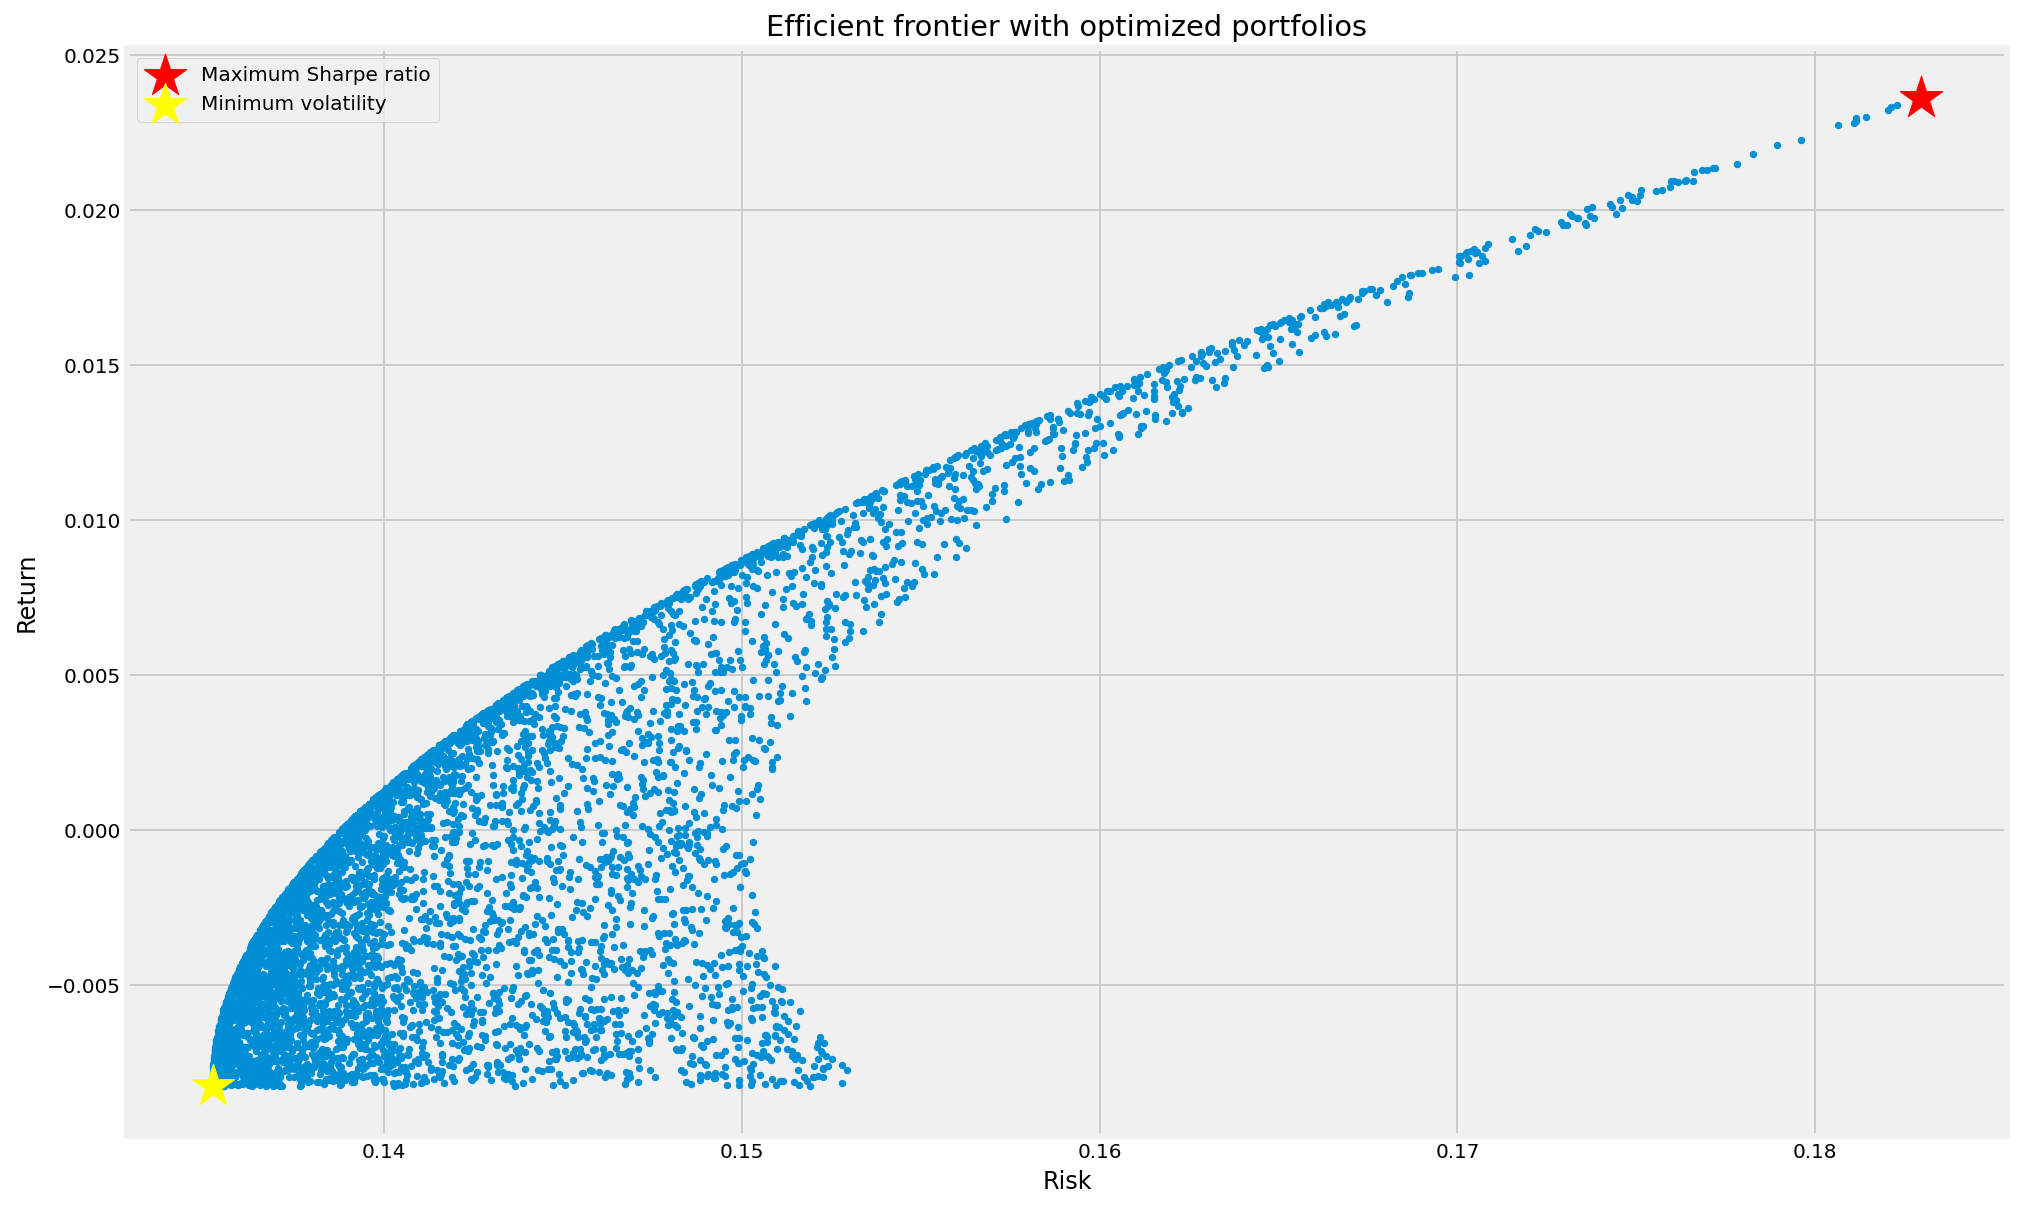

In [78]:
display_simulated_ef_with_random(mean_returns, cov_matrix, risk_free_rate)

Every portfolio on the frontier from the gold star upwards is efficient - the maximum sharpe (red star) portfolio is just highlighted as a suggestion